# Практическая работа №3: Кластерный анализ
Выполнил студент гр. 0373 Мясников Юрий. Вариант №15

## Цель работы: 
Освоение основных понятий и некоторых методов кластерного анализа,
в частности, метода k-means и метода поиска сгущений.





## Основные теоретические положения
#### Неотрицательная вещественная функция$d(x, y)$, определенная на n-мерном пространстве, называется функцией расстояния (метрикой), если:

1. $d(x, y) {\geqslant} 0$
2. $d(x, y) = d(y, x)$
3. $d(x, y) {\leqslant} d(x, z) + d(z, y)$


Евклидово расстояние: $d(x, y) = \sqrt{\sum{(x_i - y_i)^2}}$

Квадрат Евклидова расстояния:  $d^2(x, y) = {\sum{(x_i - y_i)^2}}$

Расстояние городских кварталов / Манхэттенское расстояние / Taxicab: $d(x, y) = {\sum{|x_i - y_i|}}$

#### Алгоритм кластеризации k-means:

Суть алгоритма заключается в минимизации суммарного квадратичного отклонения точек кластеров от центроидов.
В качестве критерия используется минимальное расстояние внутри кластера относительно среднего.
В качестве метрики используется квадрат Евклидова расстояния.

Алгоритм:

1. Случайно выбрать $k$ точек, являющихся начальными центроидами
2. Отнести каждый объект к кластеру с ближайшим центроидом
3. Пересчитать центроиды кластеров согласно текущему членству.
4. Перейти к п.2, если условие остановки алгоритма не выполнено

#### Алгоритм кластеризации k-medians:

1. Метрика - Манхэттенское расстояние
2. Для определения центроида используется не среднее арифмитическое, а медиана
3. Повторять шаги до достижения выполнения критерия остановки

#### Грубая оценка:

Для любых множеств из объектов существует верхняя оценка количества кластеров $k = \lfloor{\sqrt{\frac{n}{2}}}\rfloor$, после которой увеличивать их количество нецелесообразно. Не является оптимальной.

#### Метод силуэтов:

Коэффициент силуэта вычисляется с помощью внутрикластерного расстояния (a) и среднего расстояния до ближайшего кластера (b) по каждому кластеру. $$S = \frac{1}{k}\sum{s_i}$$, где $$s_i = \frac{b_i - a_i}{a_i \vee b_i}$$, 
где $$a_i = \frac{1}{\#C_i - 1}\sum{d(x_j,x_{C_i})}$$,
где $$b_i = \min\limits_{j\neq i}\frac{1}{\#C_j}\sum{d(x_j, x_{C_i})}$$

При этом, если $\#C_i = 1$, то $s_i = 0$


#### Метод поиска сгущений:

Является FOREL(Formal Elements)-алгоритмом.
Известно, что кластеры имеют радиус R. 

Радиус выбирается в соответствии с неравенством $R_{min} < R < R_{max}$. Строится матрица расстояний $D = \{d_{ij}\}$, где $d_{ij}$ - метрика между $i$ и $j$.

$$R_{min} = min\{d_{ij}>0\}$$
$$R_{max} = max\{d_{ij}\}$$

Алгоритм метода:

1. $U := X$
2. $X_c \in U$
3. Раздувается окружность радиуса R, отбираются попадающие в нее точки
4. Рассчитывается значение нового центроида = $\widetilde{x_с} := \frac{\sum{X}}{\#k}$
5. Если $X_c \neq \widetilde{x_с}$, то $X_c := \widetilde{x_с}$, goto 3
6. Из U исключаются все помеченные точки. Они образуют кластер и далее в анализе не участвуют
7. $K := K \cup \{X_c\}$
8. If $\#U>0$: goto 2, else: заканчиваем алгоритм.

#### Нормализация множества точек minmax:

Нормализация minmax: $X_n = \frac{X - X_{min}}{X_{max} - X_{min}}$

## Постановка задачи
Дано конечное множество из объектов, представленных двумя признаками (в качестве этого множества принимаем исходную двумерную выборку, сформированную ранее в практической работе №2). Выполнить разбиение исходного множества объектов на конечное число подмножеств
(кластеров) с использованием метода k-means и метода поиска сгущений. Полученные результаты содержательно проинтерпретировать.



## Выполнение работы
В представленной ниже выборке из генеральной совокупности "2021-2022 Regular Season NBA Player Stats" содержится процент попадания трехочковых бросков (3P%) и двухочковых бросков (2P%) игроков за регулярный сезон NBA 2021-2022 

In [1255]:
import math
from tabulate import tabulate
from math import log2
from math import sqrt
import matplotlib.pyplot
import pandas
#1
sample = [0.313,
0,
0,
0,
0.396,
0.375,
0.25,
0.22,
0,
0.341,
0.5,
0.489,
0,
0.167,
0.393,
0,
0.32,
0.373,
0.346,
0.5,
0,
0.375,
0.346,
0.333,
0,
0.431,
0.4,
0,
0.394,
0,
0.347,
0.429,
0.373,
0,
0.182,
0.347,
0.397,
0.4,
0,
0.338,
0,
0.5,
0,
0.429,
0.389,
0.5,
0,
0.375,
0,
0.364,
0.2,
0.391,
0.667,
0.3,
0.302,
0,
0.522,
0.397,
0.1,
0,
0,
0.417,
0.345,
0.231,
0.333,
0,
0.333,
0.404,
0,
0.212,
0.426,
1,
0,
0.364,
0.267,
0,
0.2,
0.357,
0.408,
0.205,
0.2,
0,
0.375,
0.227,
0.4,
0.368,
0.386,
0.333,
0,
0.333,
0,
0.229,
0.6
]

sample2 = [0.556,
0.429,
0.598,
1,
0.529,
0.588,
0.667,
0.537,
0.667,
0.61,
0.644,
0.465,
1,
0.533,
0.421,
0.5,
0.579,
0.75,
0.522,
0.5,
0.647,
0.577,
0.478,
0.583,
0,
0.464,
0.741,
1,
0.505,
0,
0.35,
0.652,
0.531,
0.5,
0.5,
0.504,
0.45,
0.583,
0,
0.55,
0,
1,
0.333,
0.5,
0.4,
0.5,
0.622,
0.633,
0.792,
0.536,
0.438,
0.708,
0.652,
0.417,
0.548,
0.375,
0.625,
0.526,
0.571,
0.453,
1,
0.417,
0.534,
0.385,
0.7,
0.545,
0.403,
0.509,
0,
0.555,
0.571,
0.5,
0,
0.5,
0.467,
0.636,
0.513,
0.25,
0.385,
0.581,
0.455,
0.273,
0.333,
0.5,
0,
0.439,
0.562,
0,
0.636,
0.167,
0.333,
0.523,
0
]
print("This is the sample: ")
print("3P%\t2P%")
i = 0
while i < len(sample):
    print(sample[i], "\t", sample2[i])
    i = i + 1

This is the sample: 
3P%	2P%
0.313 	 0.556
0 	 0.429
0 	 0.598
0 	 1
0.396 	 0.529
0.375 	 0.588
0.25 	 0.667
0.22 	 0.537
0 	 0.667
0.341 	 0.61
0.5 	 0.644
0.489 	 0.465
0 	 1
0.167 	 0.533
0.393 	 0.421
0 	 0.5
0.32 	 0.579
0.373 	 0.75
0.346 	 0.522
0.5 	 0.5
0 	 0.647
0.375 	 0.577
0.346 	 0.478
0.333 	 0.583
0 	 0
0.431 	 0.464
0.4 	 0.741
0 	 1
0.394 	 0.505
0 	 0
0.347 	 0.35
0.429 	 0.652
0.373 	 0.531
0 	 0.5
0.182 	 0.5
0.347 	 0.504
0.397 	 0.45
0.4 	 0.583
0 	 0
0.338 	 0.55
0 	 0
0.5 	 1
0 	 0.333
0.429 	 0.5
0.389 	 0.4
0.5 	 0.5
0 	 0.622
0.375 	 0.633
0 	 0.792
0.364 	 0.536
0.2 	 0.438
0.391 	 0.708
0.667 	 0.652
0.3 	 0.417
0.302 	 0.548
0 	 0.375
0.522 	 0.625
0.397 	 0.526
0.1 	 0.571
0 	 0.453
0 	 1
0.417 	 0.417
0.345 	 0.534
0.231 	 0.385
0.333 	 0.7
0 	 0.545
0.333 	 0.403
0.404 	 0.509
0 	 0
0.212 	 0.555
0.426 	 0.571
1 	 0.5
0 	 0
0.364 	 0.5
0.267 	 0.467
0 	 0.636
0.2 	 0.513
0.357 	 0.25
0.408 	 0.385
0.205 	 0.581
0.2 	 0.455
0 	 0.273
0.375 	 0.333
0.22

Выборка репрезентативная, была отобрана простым способом

В силу выбранных данных разброс как первого, так и второго параметра равен 1 на отрезке [0, 1]. Процесс нормализации картину не изменит, однако продемонстримуем выполнение алгоритма для ее абстрактного осуществления

This is the normalized sample: 
3P%	2P%
0.313 	 0.556
0.0 	 0.429
0.0 	 0.598
0.0 	 1.0
0.396 	 0.529
0.375 	 0.588
0.25 	 0.667
0.22 	 0.537
0.0 	 0.667
0.341 	 0.61
0.5 	 0.644
0.489 	 0.465
0.0 	 1.0
0.167 	 0.533
0.393 	 0.421
0.0 	 0.5
0.32 	 0.579
0.373 	 0.75
0.346 	 0.522
0.5 	 0.5
0.0 	 0.647
0.375 	 0.577
0.346 	 0.478
0.333 	 0.583
0.0 	 0.0
0.431 	 0.464
0.4 	 0.741
0.0 	 1.0
0.394 	 0.505
0.0 	 0.0
0.347 	 0.35
0.429 	 0.652
0.373 	 0.531
0.0 	 0.5
0.182 	 0.5
0.347 	 0.504
0.397 	 0.45
0.4 	 0.583
0.0 	 0.0
0.338 	 0.55
0.0 	 0.0
0.5 	 1.0
0.0 	 0.333
0.429 	 0.5
0.389 	 0.4
0.5 	 0.5
0.0 	 0.622
0.375 	 0.633
0.0 	 0.792
0.364 	 0.536
0.2 	 0.438
0.391 	 0.708
0.667 	 0.652
0.3 	 0.417
0.302 	 0.548
0.0 	 0.375
0.522 	 0.625
0.397 	 0.526
0.1 	 0.571
0.0 	 0.453
0.0 	 1.0
0.417 	 0.417
0.345 	 0.534
0.231 	 0.385
0.333 	 0.7
0.0 	 0.545
0.333 	 0.403
0.404 	 0.509
0.0 	 0.0
0.212 	 0.555
0.426 	 0.571
1.0 	 0.5
0.0 	 0.0
0.364 	 0.5
0.267 	 0.467
0.0 	 0.636
0.2 	 0.513


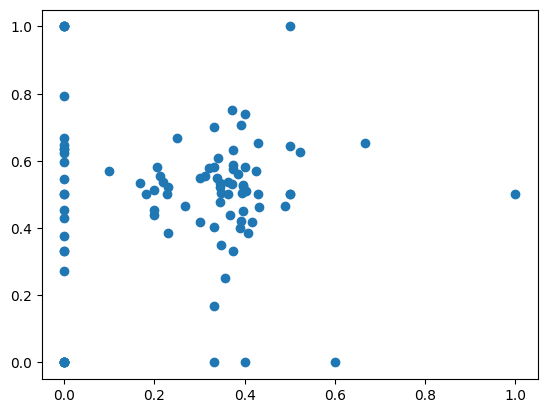

In [1256]:
#Нормализовать точки выбранного множества
#Метод минимакс
sample_max = max(sample)
sample_min = min(sample)
sample_norm = []
i = 0
while i < len(sample):
    sample_norm.append((sample[i] - sample_min)/(sample_max - sample_min))
    i = i + 1
sample2_max = max(sample2)
sample2_min = min(sample2)
sample2_norm = []
i = 0
while i < len(sample2):
    sample2_norm.append((sample2[i] - sample2_min)/(sample2_max - sample2_min))
    i = i + 1
print("This is the normalized sample: ")
print("3P%\t2P%")
i = 0
while i < len(sample):
    print(sample_norm[i], "\t", sample2_norm[i])
    i = i + 1
matplotlib.pyplot.scatter(sample_norm, sample2_norm)
matplotlib.pyplot.show()

Выше на графике продемонстрировано нормализованное множество точек

In [1257]:
#2 Выбор k методом грубой оценки
k = int(sqrt(len(sample)/2).real//1)
print(k)

6


Методом верхней грубой оценки было выбрано количество кластеров k = 6

In [1258]:
#3 k-means
from itertools import count
import math
from cmath import sqrt
import numpy
import pandas
import matplotlib.pyplot
import scipy
import sets
import pandas
#1
#1.1
data = [sample_norm, 
        sample2_norm]
#k = 6
epsilon = 0.01
array = []
array2 = []
#centroids = [[2, -8], 
#                [-1, 17]]
centroids = [[sample_norm[50], sample2_norm[50]], #случайно задавать?
                [sample_norm[35], sample2_norm[35]], [sample_norm[0], sample2_norm[0]], [sample_norm[20], sample2_norm[20]], [sample_norm[65], sample2_norm[65]], [sample_norm[80], sample2_norm[80]], [sample_norm[90], sample2_norm[90]]]
def k_means(data, k, centroids, epsilon):
        global array
        global array2
        print("---------------------------------------")
        if k == 2:
                clusters =  [[],[]]
        if k == 3:
                clusters =  [[],[],[]]
        if k == 6:
                clusters = [[],[],[],[],[],[]]
        clusters = []
        i = 0
        while i < k:
                clusters.append([])
                i = i + 1
        #clusters = k*[[]]
        if k == 2:
                new_centroids = [[0, 0], 
                                [0, 0]]
        if k == 3:
                new_centroids = [[0, 0], [0, 0], [0, 0]]
        if k == 6:
                new_centroids = [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]
        #new_centroids = [[0, 0]]*k
        i = 0
        new_centroids = []
        while i < k:
                new_centroids.append([0, 0])
                i = i + 1
        i = 0
        while i < len(data[0]):
                if k == 2:
                        distance_from_centroids = [0,0]
                if k == 3:
                        distance_from_centroids = [0, 0, 0]
                if k == 6:
                        distance_from_centroids = [0, 0, 0, 0, 0, 0]
                if k == 8:
                        distance_from_centroids = [0, 0, 0, 0, 0, 0, 0, 0]
                l = 0
                distance_from_centroids = []
                while l < k:
                        distance_from_centroids.append(0)
                        l = l + 1
                j = 0
                while j < k:
                        #if data[0][i] == 0.25:
                                #print(f"distance_from_centroids[{j}] = {distance_from_centroids[j]} + ({data[0][i]} - {centroids[j][0]})**2 + ({data[1][i]} - {centroids[j][1]})**2")
                        distance_from_centroids[j] = (data[0][i] - centroids[j][0])**2 + (data[1][i] - centroids[j][1])**2
                        j = j + 1
                j = 0
                while j < k:
                        #if data[0][i] == 0.25:
                                #print(f"if {distance_from_centroids[j]} == {min(distance_from_centroids)}")
                        if distance_from_centroids[j] == min(distance_from_centroids):
                                #if data[0][i] == 0.25:
                                        #print(f"Определяем {i} точку в кластер {j}")
                                #print(f"{clusters[j]}.append({i})")
                                clusters[j].append(i)
                                #print("Держите кластеры", clusters)
                        j = j + 1
                i = i + 1
        #print("Держите кластеры", clusters)
        i = 0
        while i < k:
                j = 0 
                #print(f"Пересчитываем центроид для {i}-го кластера")
                while j < len(data[0]):
                        #print(f"if {j} in {clusters[i]}")
                        if j in clusters[i]:
                                #print(f"new_centroids[i][0] = {new_centroids[i][0]} + {data[0][j]}")
                                #print(f"new_centroids[i][1] = {new_centroids[i][1]} + {data[1][j]}")
                                new_centroids[i][0] = new_centroids[i][0] + data[0][j]
                                new_centroids[i][1] = new_centroids[i][1] + data[1][j]
                        j = j + 1
                #print(f"new_centroids[i][0] = {new_centroids[i][0]}/len({clusters[i]})")
                #print(f"new_centroids[i][1] = {new_centroids[i][1]}/len({clusters[i]})")
                new_centroids[i][0] = new_centroids[i][0]/len(clusters[i])
                new_centroids[i][1] = new_centroids[i][1]/len(clusters[i])
                i = i + 1
        #print("центроиды до \n ", centroids)
        #print("центроиды после \n ", new_centroids)
        i = 0
        trigger = 0
        #print("trigger = ", trigger)
        while i < k:
                #print(f"distance_between_centroids = ({new_centroids[i][0]} - {centroids[i][0]})**2 + ({new_centroids[i][1]} - {centroids[i][1]})")
                distance_between_centroids = (new_centroids[i][0] - centroids[i][0])**2 + (new_centroids[i][1] - centroids[i][1])**2
                #print(f"if {distance_between_centroids} > {epsilon}")
                if distance_between_centroids > epsilon:
                        trigger = 1
                        #print("trigger = ", trigger)
                        k_means(data,k,new_centroids, epsilon)
                        break
                        #raise IndexError("закончили здесь")
                i = i + 1
        #if trigger == 0:
                #print("Были получены кластеры", clusters)
                #print("Были получены центроиды", new_centroids)
                #print("Этот шаг функции вызывался от центроидов \n", centroids)
                #return clusters, new_centroids
        #if centroids == new_centroids:
        if trigger == 0:
                #print("Это ответ через print")
                global array
                global array2
                array.append(clusters)
                array2.append(new_centroids)
                print(clusters, new_centroids)
        #return clusters, new_centroids
        #print("А это ответ через return тех же переменных")
        #return clusters, new_centroids
        return " " #здесь "пропадают" выводы "недоехавших" функций
        
print(k_means(data,k,centroids,epsilon))
#some_clusters =  [[0, 3, 4, 6, 7], [1, 2, 5, 8, 9]]
#some_centroids = [[5.66, -3.7], [-1.24, 15.520000000000001]]
some_clusters = [[24, 29, 38, 40, 68, 72, 84, 87, 89, 92], [4, 11, 14, 18, 19, 22, 25, 28, 30, 32, 35, 36, 43, 44, 45, 49, 57, 61, 62, 66, 67, 71, 73, 77, 78, 82, 85], [5, 6, 9, 10, 16, 17, 21, 23, 26, 31, 37, 39, 41, 47, 51, 52, 56, 64, 70, 86], [3, 8, 12, 20, 27, 46, 48, 60, 75, 88], [1, 2, 15, 33, 42, 55, 59, 65, 81, 90], [0, 7, 13, 34, 50, 53, 54, 58, 63, 69, 74, 76, 79, 80, 83, 91]]
some_centroids = [[0.1666, 0.0167], [0.4151481481481482, 0.46114814814814825], [0.40170000000000006, 0.6487499999999999], [0.0, 0.8], [0.0, 0.43390000000000006], [0.22218750000000004, 0.5049374999999999]]
table = [['k', 'centroids', '#C']]
i = 0 
while i < k:
        table.append([i+1, some_centroids[i], len(some_clusters[i])])
        i = i + 1
#print(tabulate(table))
#print("These are the clusters: \n", some_clusters)
#print("These are the centroids: \n", some_centroids)

---------------------------------------
---------------------------------------
---------------------------------------
[[24, 29, 38, 40, 68, 72, 84, 87, 89, 92], [4, 11, 14, 18, 19, 22, 25, 28, 30, 32, 35, 36, 43, 44, 45, 49, 57, 61, 62, 66, 67, 71, 73, 77, 78, 82, 85], [5, 6, 9, 10, 16, 17, 21, 23, 26, 31, 37, 39, 41, 47, 51, 52, 56, 64, 70, 86], [3, 8, 12, 20, 27, 46, 48, 60, 75, 88], [1, 2, 15, 33, 42, 55, 59, 65, 81, 90], [0, 7, 13, 34, 50, 53, 54, 58, 63, 69, 74, 76, 79, 80, 83, 91]] [[0.1666, 0.0167], [0.4151481481481482, 0.46114814814814825], [0.40170000000000006, 0.6487499999999999], [0.0, 0.8], [0.0, 0.43390000000000006], [0.22218750000000004, 0.5049374999999999]]
 


Были получены кластеры (указаны номера элементов): <br /> [[24, 29, 38, 40, 68, 72, 84, 87, 89, 92], [4, 11, 14, 18, 19, 22, 25, 28, 30, 32, 35, 36, 43, 44, 45, 49, 57, 61, 62, 66, 67, 71, 73, 77, 78, 82, 85], [5, 6, 9, 10, 16, 17, 21, 23, 26, 31, 37, 39, 41, 47, 51, 52, 56, 64, 70, 86], [3, 8, 12, 20, 27, 46, 48, 60, 75, 88], [1, 2, 15, 33, 42, 55, 59, 65, 81, 90], [0, 7, 13, 34, 50, 53, 54, 58, 63, 69, 74, 76, 79, 80, 83, 91]] <br />
Были получены центроиды: <br /> [[0.1666, 0.0167], [0.4151481481481482, 0.46114814814814825], [0.40170000000000006, 0.6487499999999999], [0.0, 0.8], [0.0, 0.43390000000000006], [0.22218750000000004, 0.5049374999999999]]<br />
Далее результат будет отображен на плоскости<br />

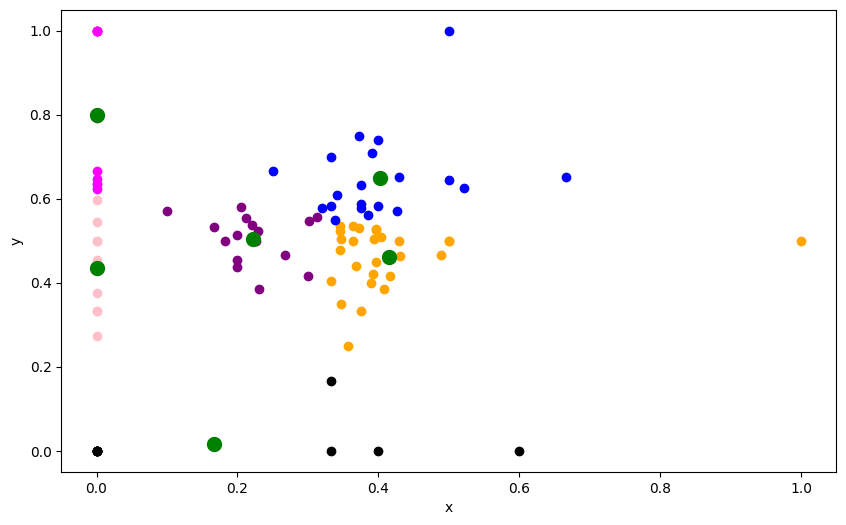

In [1259]:
def scatterplot(data, k, some_clusters, some_centroids):
    fig, ax = matplotlib.pyplot.subplots(figsize=(10,6))
    colors = ["black", "orange", "blue", "magenta", "pink", "purple", "cyan", "darksalmon", "crimson", "red", "lightblue", "violet", "brown", "olive", "orchid", "sienna", "tomato", "turquoise", "goldenrod", "aquamarine", "beige", "lavender"]
    i = 0
    while i < k:
        list_1 = []
        list_2 = []
        j = 0
        while j < len(data[0]):
            #print(f"if {j} in {some_clusters[i]}")
            if j in some_clusters[i]:
                list_1.append(data[0][j])
                list_2.append(data[1][j])
            j = j + 1
        #print(list_1)
        #print(list_2)
        ax.scatter(list_1, list_2, color=colors[i])
        f = 0
        while f < len(list_1): #тут не должно быть i
            number = data[0].index(list_1[f])
            #if f == 0:
                #matplotlib.pyplot.annotate((f"x{number}: ({list_1[f]}, {list_2[f]})"), xy=(list_1[f]-0.3,list_2[f]-1))
            #elif f == 9:
                #matplotlib.pyplot.annotate((f"x{number}: ({list_1[f]}, {list_2[f]})"), xy=(list_1[f]-0.3,list_2[f]-1))
            #else:
                #matplotlib.pyplot.annotate((f"x{number}: ({list_1[f]}, {list_2[f]})"), xy=(list_1[f]-0.3,list_2[f]+0.5))
            f = f + 1
        i = i + 1
    cent_1 = []
    cent_2 = []
    i = 0
    while i < k:
        cent_1.append(some_centroids[i][0])
        cent_2.append(some_centroids[i][1])
        i = i + 1
    ax.scatter(cent_1, cent_2, color = "green", s = 100)
    f = 0
    while f < k:
        #matplotlib.pyplot.annotate((f"Xc{f}: ({cent_1[f]}, {round(cent_2[f], 4)})"), xy=(cent_1[f]-0.3,cent_2[f]+0.5))
        f = f + 1
    matplotlib.pyplot.xlabel("x")
    matplotlib.pyplot.ylabel("y")
    matplotlib.pyplot.show()

scatterplot(data, k, some_clusters, some_centroids)

Результат выполнения алгоритма k-means. Центроиды на изображении выше выделены при помощи темно-зеленого цвета и увеличенного размера

In [1260]:
#Реализация k-medians
#Заменить метрику
#Не среднее, а медиана+
import statistics
data = [sample_norm, 
        sample2_norm]
arraymed = []
arraymed2 = []
#k = 6
epsilon = 0.01
#centroids = [[2, -8], 
#                [-1, 17]]
centroids = [[sample_norm[50], sample2_norm[50]], 
                [sample_norm[35], sample2_norm[35]], [sample_norm[0], sample2_norm[0]], [sample_norm[20], sample2_norm[20]], [sample_norm[65], sample2_norm[65]], [sample_norm[80], sample2_norm[80]], [sample_norm[90], sample2_norm[90]]]
def k_medians(data, k, centroids, epsilon):
        global arraymed
        global arraymed2
        print("---------------------------------------")
        if k == 2:
                clusters =  [[],[]]
        if k == 3:
                clusters =  [[],[],[]]
        if k == 6:
                clusters = [[],[],[],[],[],[]]
        clusters = []
        i = 0
        while i < k:
                clusters.append([])
                i = i + 1
        if k == 2:
                new_centroids = [[0, 0], 
                                [0, 0]]
        if k == 3:
                new_centroids = [[0, 0], [0, 0], [0, 0]]
        if k == 6:
                new_centroids = [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]
        i = 0
        new_centroids = []
        while i < k:
                new_centroids.append([0, 0])
                i = i + 1
        i = 0
        while i < len(data[0]):
                if k == 2:
                        distance_from_centroids = [0,0]
                if k == 3:
                        distance_from_centroids = [0, 0, 0]
                if k == 6:
                        distance_from_centroids = [0, 0, 0, 0, 0, 0]
                l = 0
                distance_from_centroids = []
                while l < k:
                        distance_from_centroids.append(0)
                        l = l + 1
                j = 0
                while j < k:
                        #if data[0][i] == 0.25:
                                #print(f"distance_from_centroids[{j}] = {distance_from_centroids[j]} + ({data[0][i]} - {centroids[j][0]})**2 + ({data[1][i]} - {centroids[j][1]})**2")
                        #distance_from_centroids[j] = (data[0][i] - centroids[j][0])**2 + (data[1][i] - centroids[j][1])**2
                        distance_from_centroids[j] = abs(data[0][i] - centroids[j][0]) + abs(data[1][i] - centroids[j][1])
                        j = j + 1
                j = 0
                while j < k:
                        #if data[0][i] == 0.25:
                                #print(f"if {distance_from_centroids[j]} == {min(distance_from_centroids)}")
                        if distance_from_centroids[j] == min(distance_from_centroids):
                                #if data[0][i] == 0.25:
                                        #print(f"Определяем {i} точку в кластер {j}")
                                #print(f"{clusters[j]}.append({i})")
                                clusters[j].append(i)
                                #print("Держите кластеры", clusters)
                        j = j + 1
                i = i + 1
        #print("Держите кластеры", clusters)
        i = 0
        while i < k:
                j = 0
                new_centroids_x_arr = []
                new_centroids_y_arr = [] 
                #print(f"Пересчитываем центроид для {i}-го кластера") MEDIAN #Здесь медина - середина упорядоченного ряда
                #пусть в кластере n элементов. 
                while j < len(data[0]):
                        if j in clusters[i]:
                                #print(f"{j} in {clusters[i]}")
                                #print(f"new_centroids[i][0] = {new_centroids[i][0]} + {data[0][j]}")
                                #print(f"new_centroids[i][1] = {new_centroids[i][1]} + {data[1][j]}")
                                #new_centroids[i][0] = new_centroids[i][0] + data[0][j]
                                #new_centroids[i][1] = new_centroids[i][1] + data[1][j]
                                #print(data[0][j])
                                #print(data[1][j])
                                new_centroids_x_arr.append(data[0][j])
                                new_centroids_y_arr.append(data[1][j])
                        j = j + 1

                #print(f"new_centroids[i][0] = {new_centroids[i][0]}/len({clusters[i]})")
                #print(f"new_centroids[i][1] = {new_centroids[i][1]}/len({clusters[i]})")
                #new_centroids[i][0] = new_centroids[i][0]/len(clusters[i])
                #new_centroids[i][1] = new_centroids[i][1]/len(clusters[i])
                new_centroids_x_arr.sort()
                new_centroids_y_arr.sort()
                #if i == 0:
                        #print(new_centroids_x_arr)
                        #print(new_centroids_y_arr)
                new_centroids[i][0] = statistics.median(new_centroids_x_arr) #Заменить на свою реализацию?
                new_centroids[i][1] = statistics.median(new_centroids_y_arr)
                #if i == 0:
                        #print(new_centroids)
                i = i + 1
        #print("центроиды до \n ", centroids)
        #print("центроиды после \n ", new_centroids)
        i = 0
        trigger = 0
        #print("trigger = ", trigger)
        while i < k:
                #print(f"distance_between_centroids = ({new_centroids[i][0]} - {centroids[i][0]})**2 + ({new_centroids[i][1]} - {centroids[i][1]})")
                #distance_between_centroids = (new_centroids[i][0] - centroids[i][0])**2 + (new_centroids[i][1] - centroids[i][1])**2
                distance_between_centroids = abs(new_centroids[i][0] - centroids[i][0]) + abs(new_centroids[i][1] - centroids[i][1])
                #print(f"if {distance_between_centroids} > {epsilon}")
                if distance_between_centroids > epsilon:
                        trigger = 1
                        #print("trigger = ", trigger)
                        k_medians(data,k,new_centroids, epsilon)
                        break
                        #raise IndexError("закончили здесь")
                i = i + 1
        #if trigger == 0:
                #print("Были получены кластеры", clusters)
                #print("Были получены центроиды", new_centroids)
                #print("Этот шаг функции вызывался от центроидов \n", centroids)
                #return clusters, new_centroids
        #if centroids == new_centroids:
        if trigger == 0:
                #print("Это ответ через print")
                #global array
                #array.append(clusters)
                global arraymed
                global arraymed2
                arraymed.append(clusters)
                arraymed2.append(new_centroids)
                print(clusters, new_centroids)
        #return clusters, new_centroids
        #print("А это ответ через return тех же переменных")
        #return clusters, new_centroids
        return " " #здесь "пропадают" выводы "недоехавших" функций
        
print(k_medians(data,k,centroids,epsilon))
#print("tut")
#print(array)

---------------------------------------
---------------------------------------
---------------------------------------
---------------------------------------
---------------------------------------
---------------------------------------
---------------------------------------
[[30, 77, 82, 84, 87, 89, 92], [4, 11, 14, 18, 19, 22, 25, 28, 32, 35, 36, 43, 44, 45, 53, 57, 61, 66, 67, 71, 73, 78, 85], [0, 5, 9, 10, 16, 17, 21, 23, 26, 31, 37, 39, 41, 47, 49, 51, 52, 54, 56, 62, 64, 70, 86], [1, 2, 3, 8, 12, 15, 20, 27, 33, 42, 46, 48, 55, 58, 59, 60, 65, 75, 88, 90], [24, 29, 38, 40, 68, 72, 81], [6, 7, 13, 34, 50, 63, 69, 74, 76, 79, 80, 83, 91]] [[0.357, 0.167], [0.396, 0.5], [0.375, 0.588], [0.0, 0.61], [0.0, 0.0], [0.212, 0.513]]
 


Были получены кластеры: <br /> [[30, 77, 82, 84, 87, 89, 92], [4, 11, 14, 18, 19, 22, 25, 28, 32, 35, 36, 43, 44, 45, 53, 57, 61, 66, 67, 71, 73, 78, 85], [0, 5, 9, 10, 16, 17, 21, 23, 26, 31, 37, 39, 41, 47, 49, 51, 52, 54, 56, 62, 64, 70, 86], [1, 2, 3, 8, 12, 15, 20, 27, 33, 42, 46, 48, 55, 58, 59, 60, 65, 75, 88, 90], [24, 29, 38, 40, 68, 72, 81], [6, 7, 13, 34, 50, 63, 69, 74, 76, 79, 80, 83, 91]] <br />
Были получены центроиды: <br /> [[0.357, 0.167], [0.396, 0.5], [0.375, 0.588], [0.0, 0.61], [0.0, 0.0], [0.212, 0.513]] <br />
Далее резулььтат будет отображен на плоскости

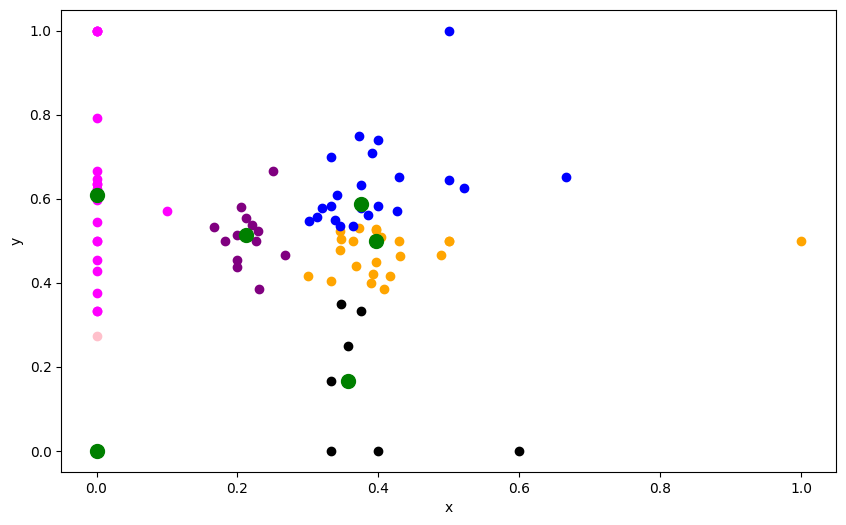

In [1261]:
some_clusters = [[30, 77, 82, 84, 87, 89, 92], [4, 11, 14, 18, 19, 22, 25, 28, 32, 35, 36, 43, 44, 45, 53, 57, 61, 66, 67, 71, 73, 78, 85], [0, 5, 9, 10, 16, 17, 21, 23, 26, 31, 37, 39, 41, 47, 49, 51, 52, 54, 56, 62, 64, 70, 86], [1, 2, 3, 8, 12, 15, 20, 27, 33, 42, 46, 48, 55, 58, 59, 60, 65, 75, 88, 90], [24, 29, 38, 40, 68, 72, 81], [6, 7, 13, 34, 50, 63, 69, 74, 76, 79, 80, 83, 91]]
some_centroids = [[0.357, 0.167], [0.396, 0.5], [0.375, 0.588], [0.0, 0.61], [0.0, 0.0], [0.212, 0.513]]
table2 = [['k', 'centroids', '#C']]
i = 0 
while i < k:
        table2.append([i+1, some_centroids[i], len(some_clusters[i])])
        i = i + 1
scatterplot(data, k, some_clusters, some_centroids)

Результат выполнения алгоритма k-medians

In [1262]:
#табличка для каждого метода (i, centroids, len(cluster))
print("k-means table:")
print(tabulate(table))
print('-----------------------------------------------------------')
print("k-medians table:")
print(tabulate(table2))



k-means table:
-  -----------------------------------------  --
k  centroids                                  #C
1  [0.1666, 0.0167]                           10
2  [0.4151481481481482, 0.46114814814814825]  27
3  [0.40170000000000006, 0.6487499999999999]  20
4  [0.0, 0.8]                                 10
5  [0.0, 0.43390000000000006]                 10
6  [0.22218750000000004, 0.5049374999999999]  16
-  -----------------------------------------  --
-----------------------------------------------------------
k-medians table:
-  --------------  --
k  centroids       #C
1  [0.357, 0.167]  7
2  [0.396, 0.5]    23
3  [0.375, 0.588]  23
4  [0.0, 0.61]     20
5  [0.0, 0.0]      7
6  [0.212, 0.513]  13
-  --------------  --


#5 Выше представлены таблицы, отображающие значения k,  центроиды кластеров и объемы кластеров. В качестве проверки сложим мощности кластеров (в обоих случаях сумма равна 93 - объему выборки). Следовательно, ни один элемент не потерялся и не был учтен более одного раза

---------------------------------------
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92]] [[0.26305376344086007, 0.4947419354838711]]
---------------------------------------
---------------------------------------
[[1, 2, 3, 7, 8, 12, 13, 15, 20, 24, 27, 29, 33, 34, 38, 40, 42, 46, 48, 50, 55, 58, 59, 60, 63, 65, 68, 69, 72, 75, 76, 79, 80, 81, 83, 87, 88, 89, 90, 91], [0, 4, 5, 6, 9, 10, 11, 14, 16, 17, 18, 19, 21, 22, 23, 25, 26, 28, 30, 31, 32, 35, 36, 37, 39, 41, 43, 44, 45, 47, 49, 51, 52, 53, 54, 56, 57, 61, 62, 64, 66, 67, 70, 71, 73, 74, 77, 78, 82, 84, 85, 86, 92]] [[0.075975, 0.46492499999999987], [0.40424528301886786, 0.5172452830188679]]
---------------------------

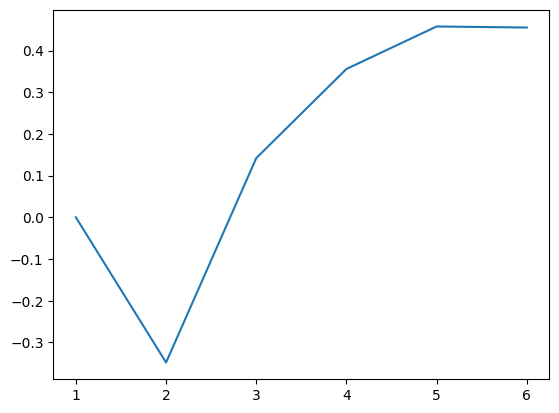

In [1263]:
#метод силуэтов Для k-means
i = 0
array.pop(0)
array2.pop(0)
while i < k:
    #print(f"Для k = {i + 1}")
    #print(k_means(data, i + 1,centroids,epsilon))
    k_means(data, i + 1, centroids, epsilon)
    i = i + 1
"""print("Here is the clusters array")
i = 0
while i < k:
    print(f"For k = {i + 1}")
    print(array[i])
    print("\n")
    i = i + 1
print("Here is the centroids array")
i = 0
while i < k:
    print(f"For k = {i + 1}")
    print(array2[i])
    print("\n")
    i = i + 1
#def silhouette(data, k, clusters, centroids):
    #i = 0
    #while i < k:
        #"""
s = []
i = 0
#Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called as mean nearest-cluster distance. The mean distance is denoted by b
while i < k: #для каждого k
    #считаем ai, bi, si, sk
    ai = 0
    bi = 0
    si = 0 #для каждого кластера
    sk = 0 #для каждого k
    j = 0
    while j < len(array[i]): #для каждого кластера
        if len(array[i]) != 1:
            l = 0
            while l < len(array[i][j]): #для каждого элемента кластера
                #print(f"ai = ai + ({data[0][array[i][j][l]]}) - {array2[i][j][0]})**2 + ({data[1][array[i][j][l]]} - {array2[i][j][1]})**2")
                ai = ai + (data[0][array[i][j][l]] - array2[i][j][0])**2 + (data[1][array[i][j][l]] - array2[i][j][1])**2 #через array и array2 уже
                l = l + 1
            #print(array[i])
            #print(f"ai = {ai}/({len(array[i])} - {1})")
            ai = ai/(len(array[i]) - 1) #зафиксировали в каждом кластере
            #print("ai = ", ai)
            l = 0
            bi = 10000
            min_dist = 0
            #для каждого другого кластера
            #для каждого элемента каждого другого кластера
            #считаем метрику между элементом и НЫНЕШНИМ центроидом
            while l < len(array[i]): #для каждого другого кластера                         
                #print("Рассматриваем новый кластер под номером l = ", l)
                if l != j:
                    f = 0
                    while f < len(array[i][l]): #для каждого элемента каждого  другого кластера
                        #print(f"if ({data[0][array[i][j][f]]} - {array2[i][l][0]})**2 + ({data[1][array[i][j][f]]} - {array2[i][l][1]})**2 < {min_dist}:")
                        #if (data[0][array[i][j][f]] - array2[i][l][0])**2 + (data[1][array[i][j][f]] - array2[i][l][1])**2 < min_dist:
                        #print(f"min_dist = min_dist + (data[0][array[{i}][{j}][{f}]] - array2[{i}][{l}][{0}])**2 + (data[1][array[i][j][f]] - array2[i][l][1])**2")
                        #print(data[0][array[i][j][f]])
                        #print(data[1][array[i][j][f]])
                        #print(i, " ", l, " ", 0)
                        #print(array2[i][l][0])
                        #min_dist = min_dist + (data[0][array[i][j][f]] - array2[i][l][0])**2 + (data[1][array[i][j][f]] - array2[i][l][1])**2
                        min_dist = min_dist + (data[0][array[i][l][f]] - array2[i][j][0])**2 + (data[1][array[i][l][f]] - array2[i][j][1])**2
                        f = f + 1
                    min_dist = min_dist/len(array[l])
                if min_dist < bi:
                    bi = min_dist
                l = l + 1
            si = (bi - ai)/max(ai, bi)
            sk = sk + si
        else:
            si = 0
            sk = sk + si
        j = j + 1
    sk = sk/(i + 1)
    s.append(sk)
    #print(s)
    i = i + 1
print("\n")
print("Сверху отображены результаты выполнения k-means при изменяющемся k от 1 до 6, выводятся кластеры и центроиды")
print("-----------------------------------------------")
print(s)
k_arr = [1, 2, 3, 4, 5, 6]
matplotlib.pyplot.plot(k_arr, s)
matplotlib.pyplot.show()



#6 Выше представлено отображение выполненного метода силуэтов для k-means. Значения Silhouette score попадают в диапазон [-1; 1], что не свидетельствует о допущенных ошибках при вычислении. Разово встречающееся отрицательное значение [-1; 0] говорит о том, что при данном k = 2 точки могут быть определены в неверные кластеры. В остальных точках за исключением k = 1 значение положительно. Чем больше значение "Показателя силуэта", тем выше точность распределения в кластеры. Про такие кластеры можно сказать "well-separated". В указанном выше случае наилучший вариант достигается при k = 5, затем график выходит на своеобразное подобие плато. Это говорит о том, что 5 является оптимальным количеством кластеров. Увеличении этого параметра в дальнейшем не будет столь целесообразным.

---------------------------------------
---------------------------------------
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92]] [[0.333, 0.513]]
---------------------------------------
---------------------------------------
---------------------------------------
[[1, 2, 3, 8, 12, 13, 15, 20, 24, 27, 29, 33, 34, 38, 40, 42, 46, 48, 55, 58, 59, 60, 65, 68, 72, 75, 81, 88, 90], [0, 4, 5, 6, 7, 9, 10, 11, 14, 16, 17, 18, 19, 21, 22, 23, 25, 26, 28, 30, 31, 32, 35, 36, 37, 39, 41, 43, 44, 45, 47, 49, 50, 51, 52, 53, 54, 56, 57, 61, 62, 63, 64, 66, 67, 69, 70, 71, 73, 74, 76, 77, 78, 79, 80, 82, 83, 84, 85, 86, 87, 89, 91, 92]] [[0.0, 0.5], [0.373, 0.5175000000000001]]
---------

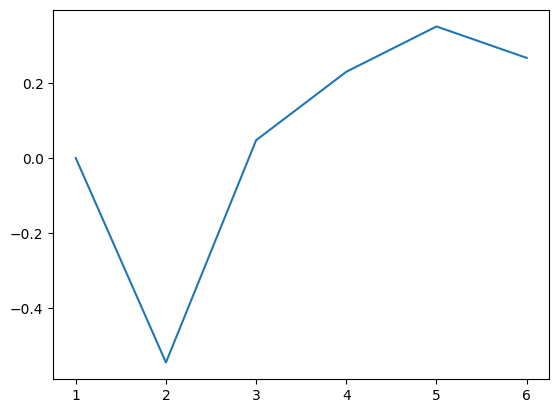

In [1264]:
#метод силуэтов Для k-medians
i = 0
arraymed.pop(0)
arraymed2.pop(0)
while i < k:
    #print(f"Для k = {i + 1}")
    #print(k_means(data, i + 1,centroids,epsilon))
    k_medians(data, i + 1, centroids, epsilon)
    i = i + 1
"""print("Here is the clusters array")
i = 0
while i < k:
    print(f"For k = {i + 1}")
    print(array[i])
    print("\n")
    i = i + 1
print("Here is the centroids array")
i = 0
while i < k:
    print(f"For k = {i + 1}")
    print(array2[i])
    print("\n")
    i = i + 1
#def silhouette(data, k, clusters, centroids):
    #i = 0
    #while i < k:
        #"""
s = []
i = 0
#Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called as mean nearest-cluster distance. The mean distance is denoted by b
while i < k: #для каждого k
    #считаем ai, bi, si, sk
    ai = 0
    bi = 0
    si = 0 #для каждого кластера
    sk = 0 #для каждого k
    j = 0
    while j < len(arraymed[i]): #для каждого кластера
        if len(arraymed[i]) != 1:
            l = 0
            while l < len(arraymed[i][j]): #для каждого элемента кластера
                #print(f"ai = ai + ({data[0][array[i][j][l]]}) - {array2[i][j][0]})**2 + ({data[1][array[i][j][l]]} - {array2[i][j][1]})**2")
                ai = ai + abs(data[0][arraymed[i][j][l]] - arraymed2[i][j][0]) + abs(data[1][arraymed[i][j][l]] - arraymed2[i][j][1]) #через array и array2 уже
                l = l + 1
            #print(array[i])
            #print(f"ai = {ai}/({len(array[i])} - {1})")
            ai = ai/(len(arraymed[i]) - 1) #зафиксировали в каждом кластере
            #print("ai = ", ai)
            l = 0
            bi = 10000
            min_dist = 0
            #для каждого другого кластера
            #для каждого элемента каждого другого кластера
            #считаем метрику между элементом и НЫНЕШНИМ центроидом
            while l < len(arraymed[i]): #для каждого другого кластера                         
                #print("Рассматриваем новый кластер под номером l = ", l)
                if l != j:
                    f = 0
                    while f < len(arraymed[i][l]): #для каждого элемента каждого  другого кластера
                        #print(f"if ({data[0][array[i][j][f]]} - {array2[i][l][0]})**2 + ({data[1][array[i][j][f]]} - {array2[i][l][1]})**2 < {min_dist}:")
                        #if (data[0][array[i][j][f]] - array2[i][l][0])**2 + (data[1][array[i][j][f]] - array2[i][l][1])**2 < min_dist:
                        #print(f"min_dist = min_dist + (data[0][array[{i}][{j}][{f}]] - array2[{i}][{l}][{0}])**2 + (data[1][array[i][j][f]] - array2[i][l][1])**2")
                        #print(data[0][array[i][j][f]])
                        #print(data[1][array[i][j][f]])
                        #print(i, " ", l, " ", 0)
                        #print(array2[i][l][0])
                        #min_dist = min_dist + (data[0][array[i][j][f]] - array2[i][l][0])**2 + (data[1][array[i][j][f]] - array2[i][l][1])**2
                        min_dist = min_dist + abs(data[0][arraymed[i][l][f]] - arraymed2[i][j][0]) + abs(data[1][arraymed[i][l][f]] - arraymed2[i][j][1])
                        f = f + 1
                    min_dist = min_dist/len(arraymed[l])
                if min_dist < bi:
                    bi = min_dist
                l = l + 1
            si = (bi - ai)/max(ai, bi)
            sk = sk + si
        else:
            si = 0
            sk = sk + si
        j = j + 1
    sk = sk/(i + 1)
    s.append(sk)
    #print(s)
    i = i + 1
print("\n")
print("Сверху отображены результаты выполнения k-medians при изменяющемся k от 1 до 6, выводятся кластеры и центроиды")
print("-----------------------------------------------")
print(s)
k_arr = [1, 2, 3, 4, 5, 6]
matplotlib.pyplot.plot(k_arr, s)
matplotlib.pyplot.show()

Ситуация с k-medians отличается не то чтобы сильным образом. Наблюдается такой же характер поведения всех точек. Однако стоит заметить, что в данном случае значение k = 5 является пиковым (считается более показательным), а не предшествующим идущему далее "плато". 

In [1265]:
#7 Поиск сгущений
u = []
i = 0
while i < len(sample):
    u.append(i)
    i = i + 1
#print(u)
i = 0
j = 0
D = []
while i < len(sample):
    D.append([])
    j = 0
    while j < len(sample):
        D[i].append(0)
        j = j + 1
    i = i + 1
#print(D)
i = 0
j = 0
while i < len(sample):
    j = 0
    while j < len(sample):
        D[i][j] = math.sqrt((data[0][i] - data[0][j])**2 + (data[1][i] - data[1][j])**2)
        j = j + 1
    i = i + 1
R_min = 1000
R_max = -1
i = 0
j = 0
while i < len(sample):
    j = 0
    while j < len(sample):
        if D[i][j] > R_max:
            R_max = D[i][j]
        if D[i][j] < R_min:
            R_min = D[i][j]
        j = j + 1
    i = i + 1
print("R_min = ", R_min)
print("R_max = ", R_max)



R_min =  0.0
R_max =  1.16619037896906


Следует выбрать R такой, что R_min < R < R_max. Попробуем значения R = 0.125, R = 0.5 и R = 0.25

[[41], [1, 15, 33, 42, 55, 59, 65, 90], [24, 29, 38, 40, 68, 72], [0, 4, 5, 6, 7, 9, 16, 18, 21, 22, 23, 28, 31, 32, 35, 37, 39, 47, 49, 54, 57, 62, 64, 67, 69, 70, 73, 86, 91, 36, 43, 74, 85, 14, 25, 61], [10, 56], [2, 8, 20, 46, 58, 75, 88], [3, 12, 27, 60], [48], [17, 26, 51], [30, 44, 53, 63, 66, 77, 78, 82], [13, 34, 50, 76, 80, 83, 79], [11, 19, 45], [84, 87], [71], [92], [89], [81], [52]]
This is the centroids array
[[0.5, 1.0], [0.0, 0.4335], [0.0, 0.0], [0.36873333333333336, 0.5257333333333334], [0.511, 0.6345000000000001], [0.014285714285714287, 0.6252857142857143], [0.0, 1.0], [0.0, 0.792], [0.38800000000000007, 0.733], [0.3425, 0.365375], [0.1972857142857143, 0.5028571428571429], [0.4963333333333333, 0.48833333333333334], [0.36650000000000005, 0.0], [1.0, 0.5], [0.6, 0.0], [0.333, 0.167], [0.0, 0.273], [0.667, 0.652]]


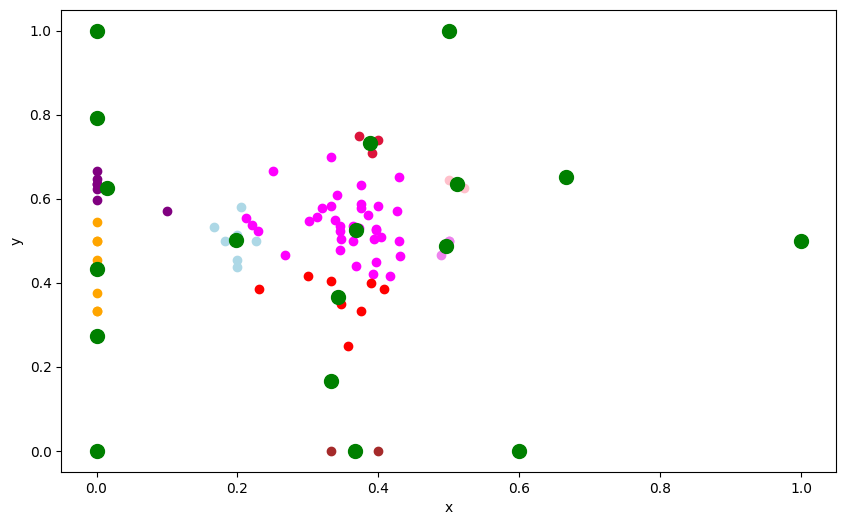

In [1266]:
import random
R = 0.125
kss = []
f = -1
while len(u) != 0:
    f = f + 1
    kss.append([])
    random_index = u[random.randint(0, len(u) - 1)]
    centroid = [data[0][random_index], data[1][random_index]]
    #new_centroid = [0, 0]
    while True:
        sum_x = 0
        sum_y = 0
        i = 0
        counter = 0
        while i < len(data[0]):
            if math.sqrt((data[0][i] - centroid[0])**2 + (data[1][i] - centroid[1])**2) <= R:
                trigger = 0
                if i in u:
                    if i not in kss[f]:
                        kss[f].append(i)
                    counter = counter + 1
                    sum_x = sum_x + data[0][i]
                    sum_y = sum_y + data[1][i]
            i = i + 1
        if counter != 0:
            new_centroid = [sum_x/counter, sum_y/counter]
        if math.sqrt((centroid[0] - new_centroid[0])**2 + (centroid[1] - new_centroid[1])**2) > epsilon:
            centroid = new_centroid
        else:
            t = 0
            while t < len(kss[f]):
                if kss[f][t] in u:
                    removal_index = u.index(kss[f][t])
                    u.pop(removal_index)
                t = t + 1
            kss[f].append(new_centroid)
            break
centroids_arr = []
i = 0
while i < len(kss):
    centroids_arr.append(kss[i][-1])
    kss[i].pop(-1)
    i = i + 1
print(kss)
print("This is the centroids array")
print(centroids_arr)
scatterplot(data, len(kss), kss, centroids_arr)
table3 = [['R', 'centroids', '#C']]
i = 0 
while i < len(kss):
        table3.append([R, centroids_arr[i], len(kss[i])])
        i = i + 1

[[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 39, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 73, 74, 75, 76, 77, 78, 79, 80, 82, 83, 85, 86, 88, 91, 1, 42, 55, 81, 89, 90], [24, 29, 38, 40, 68, 72, 84, 87, 92], [71]]
This is the centroids array
[[0.2773205128205127, 0.519371794871795], [0.14811111111111114, 0.0], [1.0, 0.5]]


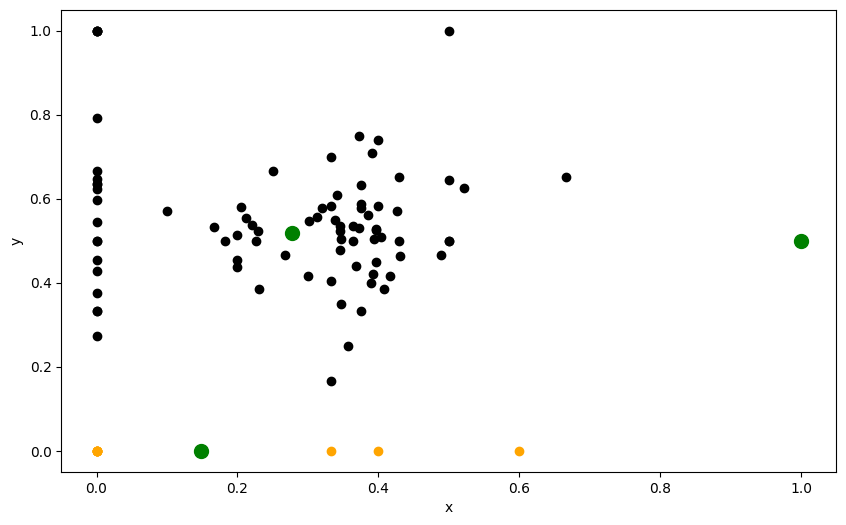

In [1267]:
R = 0.5
kss = []
i = 0
while i < len(sample):
    u.append(i)
    i = i + 1
f = -1
while len(u) != 0:
    f = f + 1
    kss.append([])
    random_index = u[random.randint(0, len(u) - 1)]
    centroid = [data[0][random_index], data[1][random_index]]
    #new_centroid = [0, 0]
    while True:
        sum_x = 0
        sum_y = 0
        i = 0
        counter = 0
        while i < len(data[0]):
            if math.sqrt((data[0][i] - centroid[0])**2 + (data[1][i] - centroid[1])**2) <= R:
                trigger = 0
                if i in u:
                    if i not in kss[f]:
                        kss[f].append(i)
                    counter = counter + 1
                    sum_x = sum_x + data[0][i]
                    sum_y = sum_y + data[1][i]
            i = i + 1
        if counter != 0:
            new_centroid = [sum_x/counter, sum_y/counter]
        if math.sqrt((centroid[0] - new_centroid[0])**2 + (centroid[1] - new_centroid[1])**2) > epsilon:
            centroid = new_centroid
        else:
            t = 0
            while t < len(kss[f]):
                if kss[f][t] in u:
                    removal_index = u.index(kss[f][t])
                    u.pop(removal_index)
                t = t + 1
            kss[f].append(new_centroid)
            break
centroids_arr = []
i = 0
while i < len(kss):
    centroids_arr.append(kss[i][-1])
    kss[i].pop(-1)
    i = i + 1
print(kss)
print("This is the centroids array")
print(centroids_arr)
scatterplot(data, len(kss), kss, centroids_arr)
table4 = [['R', 'centroids', '#C']]
i = 0 
while i < len(kss):
        table4.append([R, centroids_arr[i], len(kss[i])])
        i = i + 1

[[0, 4, 5, 7, 9, 10, 11, 14, 16, 18, 19, 21, 22, 23, 25, 28, 30, 31, 32, 35, 36, 37, 39, 43, 44, 45, 47, 49, 50, 51, 53, 54, 56, 57, 61, 62, 63, 66, 67, 69, 70, 73, 74, 76, 77, 78, 80, 82, 83, 85, 86, 91, 6, 13, 17, 26, 34, 64, 79], [24, 29, 38, 40, 68, 72], [1, 2, 8, 15, 20, 33, 42, 46, 55, 58, 59, 65, 75, 81, 88, 90], [3, 12, 27, 48, 60], [84, 87, 89, 92], [71], [41], [52]]
This is the centroids array
[[0.34782758620689647, 0.5264137931034483], [0.0, 0.0], [0.00625, 0.507375], [0.0, 0.9583999999999999], [0.4165, 0.04175], [1.0, 0.5], [0.5, 1.0], [0.667, 0.652]]


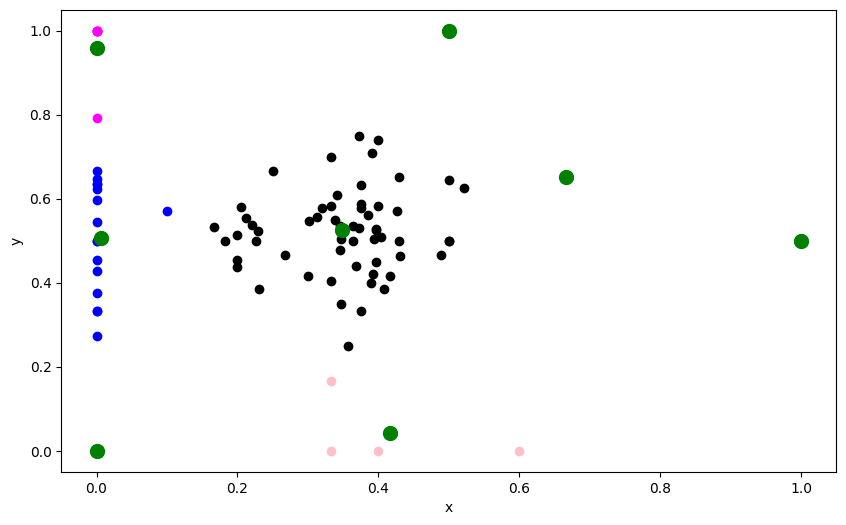

In [1274]:
R = 0.25
kss = []
i = 0
while i < len(sample):
    u.append(i)
    i = i + 1
f = -1
while len(u) != 0:
    f = f + 1
    kss.append([])
    random_index = u[random.randint(0, len(u) - 1)]
    centroid = [data[0][random_index], data[1][random_index]]
    #new_centroid = [0, 0]
    while True:
        sum_x = 0
        sum_y = 0
        i = 0
        counter = 0
        while i < len(data[0]):
            if math.sqrt((data[0][i] - centroid[0])**2 + (data[1][i] - centroid[1])**2) <= R:
                trigger = 0
                if i in u:
                    if i not in kss[f]:
                        kss[f].append(i)
                    counter = counter + 1
                    sum_x = sum_x + data[0][i]
                    sum_y = sum_y + data[1][i]
            i = i + 1
        if counter != 0:
            new_centroid = [sum_x/counter, sum_y/counter]
        if math.sqrt((centroid[0] - new_centroid[0])**2 + (centroid[1] - new_centroid[1])**2) > epsilon:
            centroid = new_centroid
        else:
            t = 0
            while t < len(kss[f]):
                if kss[f][t] in u:
                    removal_index = u.index(kss[f][t])
                    u.pop(removal_index)
                t = t + 1
            kss[f].append(new_centroid)
            break
centroids_arr = []
i = 0
while i < len(kss):
    centroids_arr.append(kss[i][-1])
    kss[i].pop(-1)
    i = i + 1
print(kss)
print("This is the centroids array")
print(centroids_arr)
scatterplot(data, len(kss), kss, centroids_arr)
table5 = [['R', 'centroids', '#C']]
i = 0 
while i < len(kss):
        table5.append([R, centroids_arr[i], len(kss[i])])
        i = i + 1

In [1269]:
print("Для R = 0.125")
print(tabulate(table3))
print("Для R = 0.5")
print(tabulate(table4))
print("Для R = 0.25")
print(tabulate(table5))

Для R = 0.125
-----  ------------------------------------------  --
R      centroids                                   #C
0.125  [0.5, 1.0]                                  1
0.125  [0.0, 0.4335]                               8
0.125  [0.0, 0.0]                                  6
0.125  [0.36873333333333336, 0.5257333333333334]   36
0.125  [0.511, 0.6345000000000001]                 2
0.125  [0.014285714285714287, 0.6252857142857143]  7
0.125  [0.0, 1.0]                                  4
0.125  [0.0, 0.792]                                1
0.125  [0.38800000000000007, 0.733]                3
0.125  [0.3425, 0.365375]                          8
0.125  [0.1972857142857143, 0.5028571428571429]    7
0.125  [0.4963333333333333, 0.48833333333333334]   3
0.125  [0.36650000000000005, 0.0]                  2
0.125  [1.0, 0.5]                                  1
0.125  [0.6, 0.0]                                  1
0.125  [0.333, 0.167]                              1
0.125  [0.0, 0.273]          

#7 Как из графических отображений, так и из таблицы нетрудно заметить, что всегда выделяется один большой кластер. Также можно подчеркнуть наблюдаемую закономерность "the less the radius is, the more clusters appear"

[[41], [0, 4, 5, 7, 9, 11, 13, 14, 16, 18, 19, 21, 22, 23, 25, 28, 30, 31, 32, 34, 35, 36, 37, 39, 43, 44, 45, 47, 49, 50, 53, 54, 57, 61, 62, 63, 66, 67, 69, 70, 73, 74, 76, 77, 78, 79, 80, 82, 83, 85, 86, 89, 91, 6, 10, 17, 26, 51, 56, 58, 64], [24, 29, 38, 40, 68, 72], [1, 15, 33, 42, 55, 59, 65, 81, 90, 2, 8, 20, 46, 75, 88], [52], [3, 12, 27, 48, 60], [84, 87, 92], [71]]
This is the centroids array
[[0.5, 1.0], [0.3436271186440677, 0.5271694915254238], [0.0, 0.0], [0.0, 0.5031333333333333], [0.667, 0.652], [0.0, 0.9583999999999999], [0.4443333333333334, 0.0], [1.0, 0.5]]


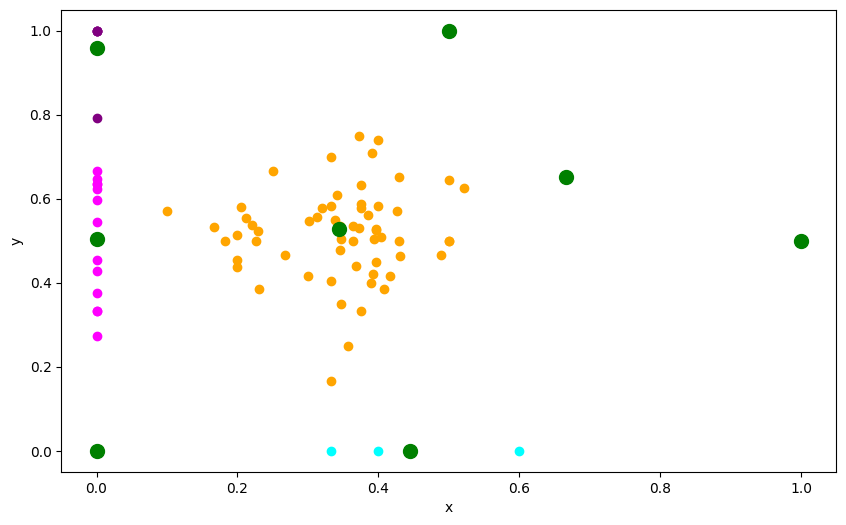

In [1273]:
#Чувствительность
R = 0.26
kss = []
i = 0
while i < len(sample):
    u.append(i)
    i = i + 1
f = -1
while len(u) != 0:
    f = f + 1
    kss.append([])
    random_index = u[random.randint(0, len(u) - 1)]
    centroid = [data[0][random_index], data[1][random_index]]
    #new_centroid = [0, 0]
    while True:
        sum_x = 0
        sum_y = 0
        i = 0
        counter = 0
        while i < len(data[0]):
            if math.sqrt((data[0][i] - centroid[0])**2 + (data[1][i] - centroid[1])**2) <= R:
                trigger = 0
                if i in u:
                    if i not in kss[f]:
                        kss[f].append(i)
                    counter = counter + 1
                    sum_x = sum_x + data[0][i]
                    sum_y = sum_y + data[1][i]
            i = i + 1
        if counter != 0:
            new_centroid = [sum_x/counter, sum_y/counter]
        if math.sqrt((centroid[0] - new_centroid[0])**2 + (centroid[1] - new_centroid[1])**2) > epsilon:
            centroid = new_centroid
        else:
            t = 0
            while t < len(kss[f]):
                if kss[f][t] in u:
                    removal_index = u.index(kss[f][t])
                    u.pop(removal_index)
                t = t + 1
            kss[f].append(new_centroid)
            break
centroids_arr = []
i = 0
while i < len(kss):
    centroids_arr.append(kss[i][-1])
    kss[i].pop(-1)
    i = i + 1
print(kss)
print("This is the centroids array")
print(centroids_arr)
scatterplot(data, len(kss), kss, centroids_arr)

[[0, 4, 5, 7, 11, 14, 16, 18, 19, 21, 22, 23, 25, 28, 30, 32, 34, 35, 36, 37, 39, 43, 44, 45, 49, 50, 53, 54, 57, 61, 62, 63, 66, 67, 69, 70, 73, 74, 76, 77, 78, 80, 82, 83, 85, 86, 89, 91, 6, 9, 10, 13, 31, 47, 51, 56, 64, 79, 17, 26], [1, 2, 8, 15, 20, 33, 42, 46, 48, 55, 58, 59, 65, 75, 88, 90], [84, 87, 92], [3, 12, 27, 60], [24, 29, 38, 40, 68, 72], [81], [71], [52], [41]]
This is the centroids array
[[0.34782758620689647, 0.5264137931034483], [0.00625, 0.5398125], [0.4443333333333334, 0.0], [0.0, 1.0], [0.0, 0.0], [0.0, 0.273], [1.0, 0.5], [0.667, 0.652], [0.5, 1.0]]


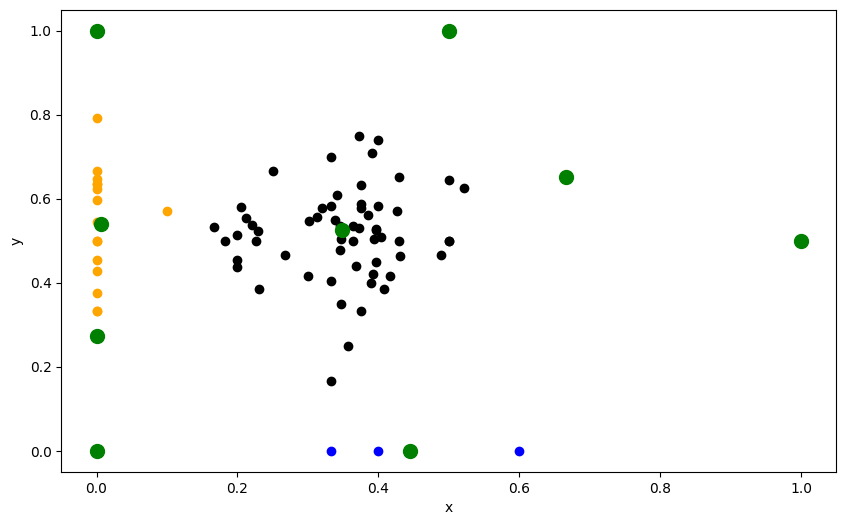

In [1271]:
R = 0.251
kss = []
i = 0
while i < len(sample):
    u.append(i)
    i = i + 1
f = -1
while len(u) != 0:
    f = f + 1
    kss.append([])
    random_index = u[random.randint(0, len(u) - 1)]
    centroid = [data[0][random_index], data[1][random_index]]
    #new_centroid = [0, 0]
    while True:
        sum_x = 0
        sum_y = 0
        i = 0
        counter = 0
        while i < len(data[0]):
            if math.sqrt((data[0][i] - centroid[0])**2 + (data[1][i] - centroid[1])**2) <= R:
                trigger = 0
                if i in u:
                    if i not in kss[f]:
                        kss[f].append(i)
                    counter = counter + 1
                    sum_x = sum_x + data[0][i]
                    sum_y = sum_y + data[1][i]
            i = i + 1
        if counter != 0:
            new_centroid = [sum_x/counter, sum_y/counter]
        if math.sqrt((centroid[0] - new_centroid[0])**2 + (centroid[1] - new_centroid[1])**2) > epsilon:
            centroid = new_centroid
        else:
            t = 0
            while t < len(kss[f]):
                if kss[f][t] in u:
                    removal_index = u.index(kss[f][t])
                    u.pop(removal_index)
                t = t + 1
            kss[f].append(new_centroid)
            break
centroids_arr = []
i = 0
while i < len(kss):
    centroids_arr.append(kss[i][-1])
    kss[i].pop(-1)
    i = i + 1
print(kss)
print("This is the centroids array")
print(centroids_arr)
scatterplot(data, len(kss), kss, centroids_arr)

#8
Назвать метод поиска сгущений, как минимум, в представленном выше случае, сильно чувствительным сложно (была проверена чувствительность для значений epsilon 0.01 и 0.001). Однако и полностью устойчивым он не является, некоторые различия присутствуют.

#9 В результате работы были рассмотрены три метода: k-means, k-medians и метод поиска сгущений. Первые два метода продемонстрировали себя практически схожим образом, показывая в общих чертах схожие значения как на графике Silhouette scores, так и на самом графическом отображении кластеров. Метод поиска сгущений в отличие от упомянутых, хоть и довольно слабо, но был привязан к некоторой чувствительности и изменению как таковому результатов в завимости от разных показателей epsilon. Так же результаты метода поиска сгущений сильно зависят от заданного в начале выполнения алгоритма радиуса R

## Выводы
В ходе выполнения данной работы:

$\cdot$ Была выполнена нормализация множества точек

$\cdot$ Была выполнена "грубая" верхняя оценка количества кластеров для множества точек

$\cdot$ Были изучены основы темы "кластерный анализ"

$\cdot$ Был реализован алгоритм k-means, его результаты были отображены на плоскости

$\cdot$ Был реализован алгоритм k-medians, его результаты были отображены на плоскости

$\cdot$ Путем применения метода силуэтов были найдены оптимальные k для упомянутых выше алгоритмов

$\cdot$ Был реализован метод поиска сгущений, его результаты были отображены на плоскости

$\cdot$ Метод поиска сгущений был протестирован на чувствительность к погрешности




